# 05 Remove Fitting Parameter Outliers

Trying to train against values which are very far outside the distribution, outliers, will throw off models. Here outliers for the fitting parameters to be predicted are found and removed. Training data files are rewritten without the fits which contain outliers.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./training_data/03_fit_params_standard.csv')

## Discovering Outliers

Plotting the fitting parameters, it appears every one contains outliers. However, some of the parameters have a small number of unique values. If a parameter was only ever set to two different values, it does no good to remove one of them.

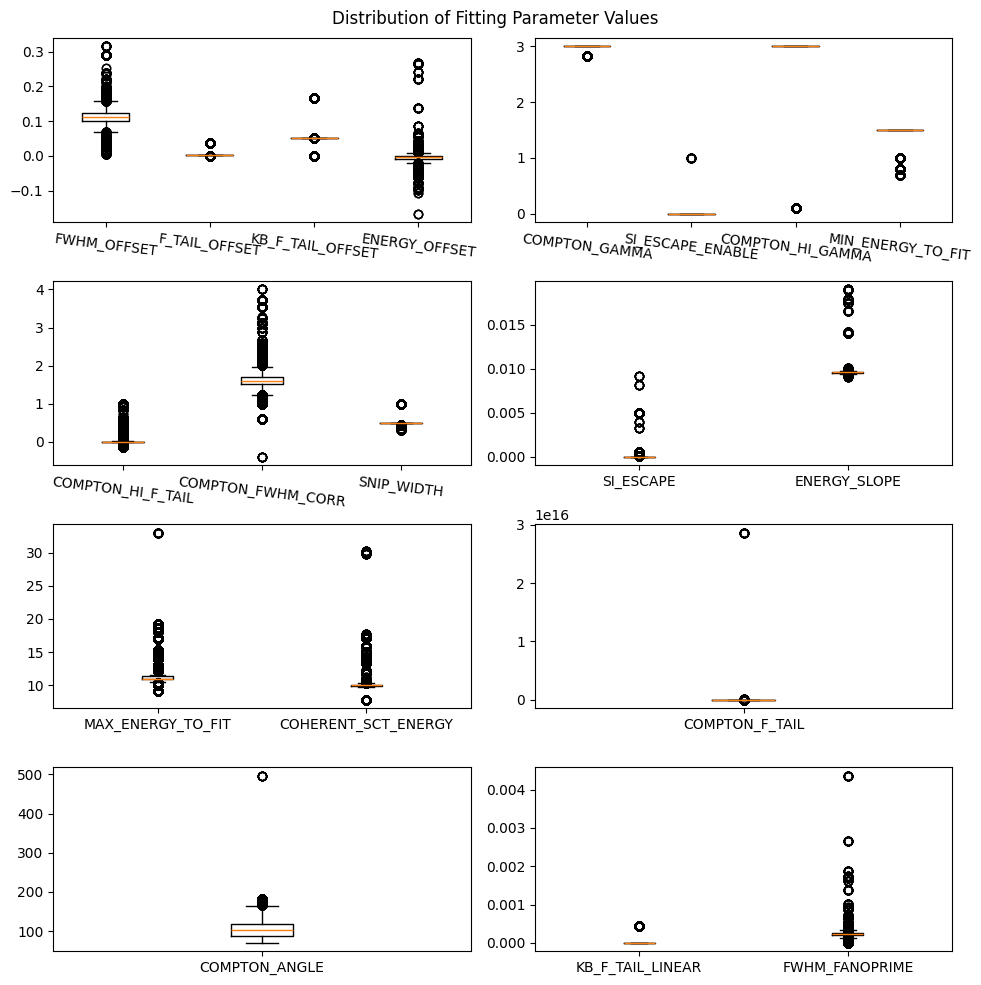

In [3]:
#Group plots by fit params with similar value ranges
fig, ax = plt.subplots(4, 2, figsize=(10, 10))
param_list = ['FWHM_OFFSET', 'F_TAIL_OFFSET', 'KB_F_TAIL_OFFSET', 'ENERGY_OFFSET']
param_vals = [df[param] for param in param_list]
ax[0][0].boxplot(param_vals)
ax[0][0].set_xticklabels(param_list, rotation=-7)

param_list = ['COMPTON_GAMMA', 'SI_ESCAPE_ENABLE', 'COMPTON_HI_GAMMA', 'MIN_ENERGY_TO_FIT']
param_vals = [df[param] for param in param_list]
ax[0][1].boxplot(param_vals)
ax[0][1].set_xticklabels(param_list, rotation=-7)

param_list = ['COMPTON_HI_F_TAIL', 'COMPTON_FWHM_CORR',  'SNIP_WIDTH']
param_vals = [df[param] for param in param_list]
ax[1][0].boxplot(param_vals)
ax[1][0].set_xticklabels(param_list, rotation=-7)

param_list = ['SI_ESCAPE', 'ENERGY_SLOPE']
param_vals = [df[param] for param in param_list]
ax[1][1].boxplot(param_vals)
ax[1][1].set_xticklabels(param_list)

param_list = ['MAX_ENERGY_TO_FIT', 'COHERENT_SCT_ENERGY']
param_vals = [df[param] for param in param_list]
ax[2][0].boxplot(param_vals)
ax[2][0].set_xticklabels(param_list)

param_list = ['COMPTON_ANGLE']
param_vals = [df[param] for param in param_list]
ax[3][0].boxplot(param_vals)
ax[3][0].set_xticklabels(param_list)

param_list = ['KB_F_TAIL_LINEAR', 'FWHM_FANOPRIME']
param_vals = [df[param] for param in param_list]
ax[3][1].boxplot(param_vals)
ax[3][1].set_xticklabels(param_list)
 
param_list = ['COMPTON_F_TAIL']
param_vals = [df[param] for param in param_list]
ax[2][1].boxplot(param_vals)
ax[2][1].set_xticklabels(param_list)
        
plt.suptitle('Distribution of Fitting Parameter Values')
plt.tight_layout()
# Show the plot
plt.show()

In [4]:
#Use interquartile range to identify the row numbers which contain outliers
def get_outliers_indices_iqr(series):
    multiplier=1.5
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    outlier_indices = (series < lower_bound) | (series > upper_bound)
    return series.index[outlier_indices].tolist()

In [5]:
#Only looking at the params that will be predicted
param_list = ['FWHM_OFFSET', 'F_TAIL_OFFSET', 'KB_F_TAIL_OFFSET', 'ENERGY_OFFSET', 'COMPTON_F_TAIL',
              'COMPTON_GAMMA', 'SI_ESCAPE_ENABLE', 'COMPTON_HI_GAMMA', 'MIN_ENERGY_TO_FIT',
              'COMPTON_HI_F_TAIL', 'COMPTON_FWHM_CORR',  'SNIP_WIDTH', 'SI_ESCAPE', 'ENERGY_SLOPE',
              'MAX_ENERGY_TO_FIT', 'COHERENT_SCT_ENERGY', 'COMPTON_ANGLE', 'KB_F_TAIL_LINEAR', 'FWHM_FANOPRIME']
print("Number of unique values:")
outliers = []
for p in param_list:
    series = df[p]
    unique = set(series)
    ct = len(unique)
    print(p, ct)
    #Only remove outliers if there are many unique values
    if ct > 10:
       outliers += get_outliers_indices_iqr(series)

Number of unique values:
FWHM_OFFSET 1156
F_TAIL_OFFSET 3
KB_F_TAIL_OFFSET 4
ENERGY_OFFSET 1161
COMPTON_F_TAIL 1139
COMPTON_GAMMA 2
SI_ESCAPE_ENABLE 2
COMPTON_HI_GAMMA 2
MIN_ENERGY_TO_FIT 4
COMPTON_HI_F_TAIL 909
COMPTON_FWHM_CORR 1148
SNIP_WIDTH 5
SI_ESCAPE 10
ENERGY_SLOPE 1157
MAX_ENERGY_TO_FIT 76
COHERENT_SCT_ENERGY 1130
COMPTON_ANGLE 1145
KB_F_TAIL_LINEAR 2
FWHM_FANOPRIME 1160


In [6]:
filtered = df.drop(outliers)

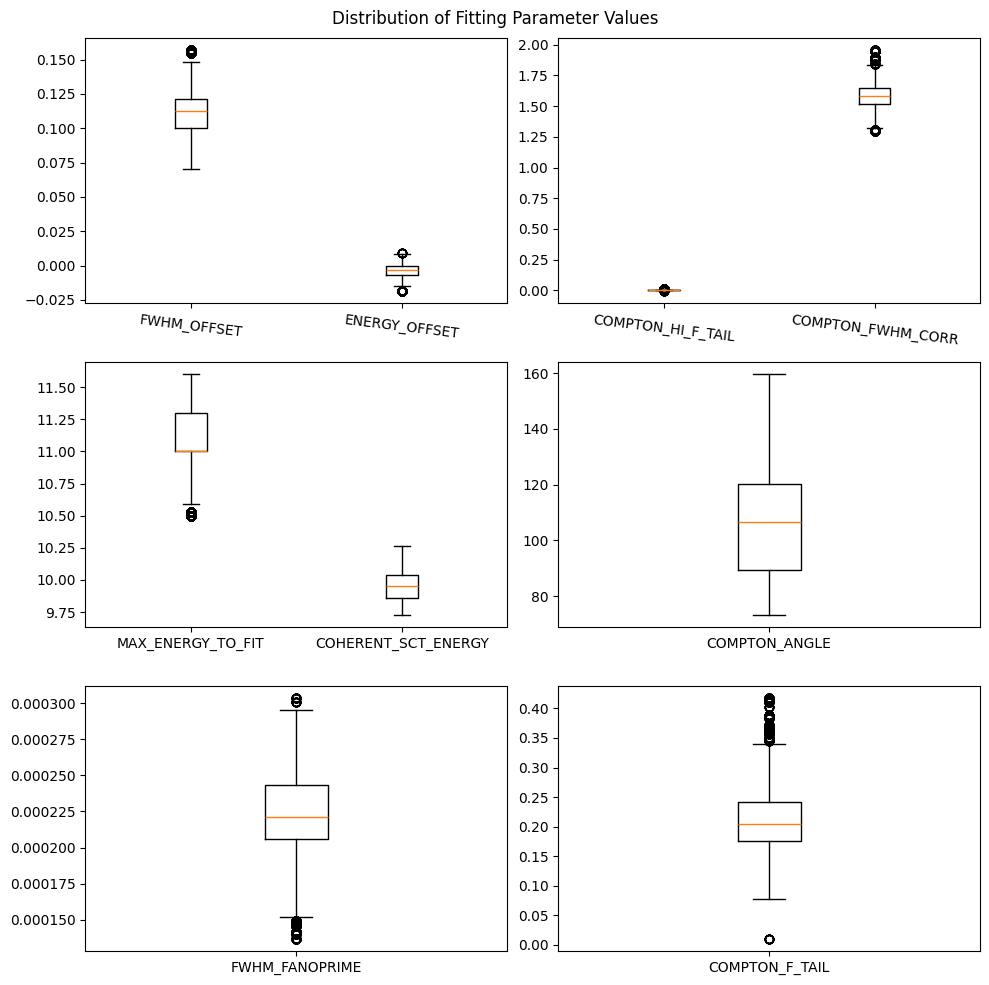

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
param_list = ['FWHM_OFFSET', 'ENERGY_OFFSET']
param_vals = [filtered[param] for param in param_list]
ax[0][0].boxplot(param_vals)
ax[0][0].set_xticklabels(param_list, rotation=-7)

param_list = ['COMPTON_HI_F_TAIL', 'COMPTON_FWHM_CORR']
param_vals = [filtered[param] for param in param_list]
ax[0][1].boxplot(param_vals)
ax[0][1].set_xticklabels(param_list, rotation=-7)

param_list = ['MAX_ENERGY_TO_FIT', 'COHERENT_SCT_ENERGY']
param_vals = [filtered[param] for param in param_list]
ax[1][0].boxplot(param_vals)
ax[1][0].set_xticklabels(param_list)

param_list = ['COMPTON_ANGLE']
param_vals = [filtered[param] for param in param_list]
ax[1][1].boxplot(param_vals)
ax[1][1].set_xticklabels(param_list)

param_list = ['FWHM_FANOPRIME']
param_vals = [filtered[param] for param in param_list]
ax[2][0].boxplot(param_vals)
ax[2][0].set_xticklabels(param_list)
 
param_list = ['COMPTON_F_TAIL']
param_vals = [filtered[param] for param in param_list]
ax[2][1].boxplot(param_vals)
ax[2][1].set_xticklabels(param_list)
        
plt.suptitle('Distribution of Fitting Parameter Values')
plt.tight_layout()
plt.savefig('outliers.png')
# Show the plot
plt.show()

In [8]:
# Some of the parameters show long tails, so some outliers are kept to not unnecessarily truncate the dataset.
print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size: {len(filtered)}")

Original dataset size: 94843
Filtered dataset size: 44837


## Writing the Filtered Dataset

Now that the row numbers for rows containing outliers are known, those rows should be excluded from the dataset. Because the rows of each datafile correspond to each other, each datafile must be rewritten. This includes the integrated spectra, experimental fit spectra, resized spectra, fitting parameters, and elements. 

In [28]:
filename = './training_data/03_int_spectra.csv'
with open(filename) as f:
    int_spectra = f.readlines()
    print(len(int_spectra))
filename = './training_data/03_resize_spectra.csv'
with open(filename) as f:
    resize_spectra = f.readlines()
    print(len(resize_spectra))
filename = './training_data/03_fit_spectra.csv'
with open(filename) as f:
    fit_spectra = f.readlines()
    print(len(fit_spectra))
filename = './training_data/03_elements.csv'
with open(filename) as f:
    elements = f.readlines()
    print(len(elements))
filename = './training_data/03_fit_params_standard.csv'
with open(filename) as f:
    fit_params = f.readlines()
    print(len(fit_params))
# Sanity check that the line counts match except for elements and fit params which should have an extra header line

94843
94843
94843
94844
94844


In [29]:
with open('./training_data/05_int_spectra.csv', 'w') as f_int:
    with open('./training_data/05_resize_spectra.csv', 'w') as f_resize:
        with open('./training_data/05_fit_spectra.csv', 'w') as f_fit:
            with open('./training_data/05_elements.csv', 'w') as f_elem:
                with open('./training_data/05_fit_params_standard.csv', 'w') as f_param:
                    # write headers
                    f_elem.write(elements[0])
                    f_param.write(fit_params[0])
                    for i in range(len(int_spectra)):
                        if i not in outliers:
                            f_int.write(int_spectra[i])                            
                            f_resize.write(resize_spectra[i])
                            f_fit.write(fit_spectra[i])
                            f_elem.write(elements[i + 1])
                            f_param.write(fit_params[i + 1])

In [9]:
spectra = pd.read_csv('./training_data/int_spectra_2023_11_09.csv', header=None)
normalized_spectra = pd.read_csv('./training_data/normalized_spectra_2023_11_09.csv', header=None)
fit_params_standard = pd.read_csv('./training_data/fit_params_standard_2023_11_09.csv')
elements = pd.read_csv('./training_data/elements_2023_11_09.csv')

with open('./training_data/fit_spectra_2023_11_09.csv') as f:
    fit_spectra = f.readlines()
with open('./training_data/resize_spectra_2023_11_09.csv') as f:
    resize_spectra = f.readlines()

In [11]:
dataframes = [spectra, normalized_spectra]
filenames = ['./training_data/filtered_int_spectra_2023_11_17.csv', 
             './training_data/filtered_normalized_spectra_2023_11_17.csv']
for i in range(len(dataframes)):
    df = dataframes[i]
    with open(filenames[i], 'w') as f:      
        for j in range(len(df)):
            if j not in outliers:
                row = df.iloc[j]
                for k in range(len(row)):
                    f.write(str(row.iloc[k]))
                    if k < len(row) - 1:
                        f.write(',')
                f.write('\n')        

In [12]:
dataframes = [fit_params_standard, elements]
filenames = ['./training_data/filtered_fit_params_standard_2023_11_17.csv',
             './training_data/filtered_elements_2023_11_17.csv']
for i in range(len(dataframes)):
    df = dataframes[i]
    with open(filenames[i], 'w') as f:
        for j in range(len(df.columns)):
            f.write(df.columns[j])
            if j < len(df.columns) - 1:
                f.write(',')
        f.write('\n')        
        for j in range(len(df)):
            if j not in outliers:
                row = df.iloc[j]
                for k in range(len(row)):
                    f.write(str(row.iloc[k]))
                    if k < len(row) - 1:
                        f.write(',')
                f.write('\n')   

In [13]:
lined_spectra = [fit_spectra, resize_spectra]
filenames = ['./training_data/filtered_fit_spectra_2023_11_17.csv', 
             './training_data/filtered_resize_spectra_2023_11_17.csv']
for i in range(len(lined_spectra)):
    with open(filenames[i], 'w') as f:      
        for j in range(len(lined_spectra[i])):
            if j not in outliers:
                f.write(lined_spectra[i][j])   